**Laboratorio de métodos cuantitativos aplicados a la Gestión**

---


Clase 6- Manipulación de datos estrucutrados y Leontief

Vamos a resolver casos de aplicación a partir de lo que aprendimos en la clase 5

In [9]:
#importamos las librerías que vamos a usar en esta ocasión
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

# Ejercicio 1

Una economía hipotética simple de dos industrias A y B está representada en la siguiente tabla  (los datos están dados en millones de pesos de productos). Determinar el valor del producto final para la economía si la demanda final cambia a  100 para A y a 200 para B:

In [10]:
columnas=['A', 'B','DF','PT']
filas=['A','B']
TB= pd.DataFrame([[150,240,210,600],[200,120,160,480]],columns=columnas,index=filas)
TB

,A,B,DF,PT
A,150,240,210,600
B,200,120,160,480


In [11]:
# agregamos las filas faltantes
TB.loc['PT'] = [600, 480, np.nan,np.nan]

TB.loc['VA'] = TB.loc['PT'] - (TB.loc['A'] + TB.loc['B'])
TB

,A,B,DF,PT
A,150.0,240.0,210.0,600.0
B,200.0,120.0,160.0,480.0
PT,600.0,480.0,NaN,NaN
VA,250.0,120.0,NaN,NaN


In [12]:
#la nueva submatriz H que nos están dando es
H= np.array([100,
             200])
#hacemos el modelo de Leontief como lo conocemos
A=np.array([(TB.loc['A']/TB.loc['PT']),
           (TB.loc['B']/TB.loc['PT'])])
A_ = A[:, :-2]

#no tenemos por que saber el orden de A asi que lo sacamos para poder armar bien la matriz identidad
A.shape
L=np.identity(2)-A_
X= np.dot(np.linalg.inv(L),H)
print('La producción total se modifica a',X[0], 'para el sector A y a', X[1],'para el sector B cuando la demanda final asciende a ', H[0],'y',H[1],'respectivamente.')

La producción total se modifica a 442.10526315789474 para el sector A y a 463.1578947368421 para el sector B cuando la demanda final asciende a  100 y 200 respectivamente.


In [13]:
A

array([[0.25      , 0.5       ,        nan,        nan],
       [0.33333333, 0.25      ,        nan,        nan]])

# Ejercicio 2

▶ 🔔  Vamos a darle un enfoque organizacional a la MIP:


Supongamos una empresa manufacturera con tres departamentos principales:

1.  **Departamento A: Producción de Componentes:** Fabrica partes y piezas que se utilizan tanto internamente en el ensamblaje como para la venta a otras empresas.
2.  **Departamento B: Ensamblaje de Productos Finales:** Utiliza los componentes producidos por el Departamento A y otros insumos externos para ensamblar el producto final de la empresa.
3.  **Departamento C: Control de Calidad y Empaquetado:** Recibe los productos ensamblados del Departamento B, realiza inspecciones de calidad, y los empaqueta para su distribución y venta.
En este caso, podemos considerar los departamentos A y B como las "industrias" en el modelo de Leontief.

*   **Matriz Interna:** Esta matriz representaría cuánto de la producción de cada departamento es utilizada como insumo por el otro departamento.
*   **Vector de Demanda Final:** Representaría la demanda externa de los productos de cada departamento.

    *   Demanda de componentes del Departamento A por parte de clientes externos.
    *   Demanda de productos finales empaquetados por el Departamento C por parte de los clientes de la empresa.

*   **Vector de Producción Total:** Representaría el nivel total de producción necesario en cada departamento para satisfacer tanto la demanda interna (insumos para el otro departamento) como la demanda externa.



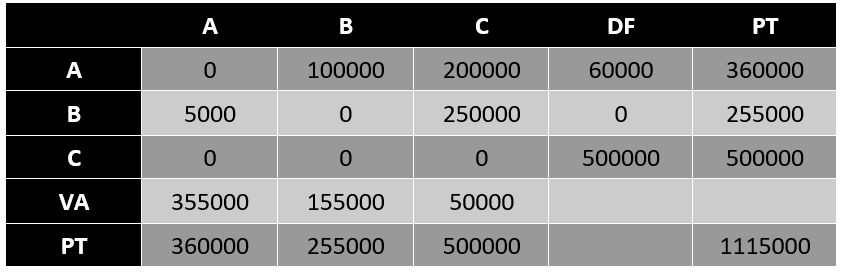

In [14]:
#TABLA DE DATOS INICIAL
tb = pd.DataFrame({
    'A': [0, 5000, 0],
    'B': [100000, 0, 0],
    'C': [200000, 250000, 0],
    'DF': [60000, 0, 500000],
    'PT': [360000, 255000, 500000]
}, index=['A','B','C'])

#MATRIZ A

sectores = ['A','B','C']
B = tb[sectores]        #submatriz B
x = tb['PT']            #vector producción total por sector

A_tb = B.T.div(x).T     #divide cada columna por el PT de ese sector

print("Matriz A:\n", A_tb, "\n")

#MODELO ABIERTO DE LEONTIEF

I = np.identity(len(A_tb))
L = np.linalg.inv(I - A_tb)
L

Matriz A:
           A         B         C
A  0.000000  0.277778  0.555556
B  0.019608  0.000000  0.980392
C  0.000000  0.000000  0.000000 



array([[1.00547645, 0.27929901, 0.83242059],
       [0.01971522, 1.00547645, 0.99671413],
       [0.        , 0.        , 1.        ]])

De pronto se incrementa la demanda final del departamento A a 90000 unidades. ¿Cómo varía la producción en la empresa?

In [15]:
tb['DF'][0]=90000
X=np.dot(L,tb['DF'])
print(X)
print(f'El departamento A modifica su cantidad producida de {x[0]} a {X[0]}, el departamento B modifica su cantidad producida de {x[1]} a {X[1]} y el C de {x[2]} a {X[2]}')

[506703.17634173 500131.43483023 500000.        ]
El departamento A modifica su cantidad producida de 360000 a 506703.1763417305, el departamento B modifica su cantidad producida de 255000 a 500131.43483022996 y el C de 500000 a 500000.0


/tmp/ipython-input-2432426151.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  tb['DF'][0]=90000
/tmp/ipython-input-2432426151.py:1: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer 

# Ejercicio 3

A partir de la siguiente tabla de ventas, crear una nueva columna que sea el producto de Precio Unitario y Cantidad Vendida y crear un gráfico de barras que muestre el total de ventas por lugar.

In [16]:
vt = pd.read_csv("ventas.csv")
vt

,Fecha,Producto,Vendedor,Ciudad,Cantidad,Precio_Unitario
0,2024-01-01,Monitor,Juan,Mendoza,6,23030
1,2024-01-02,Notebook,Lucía,La Plata,7,87838
2,2024-01-03,Teclado,Juan,Córdoba,3,89717
3,2024-01-04,Notebook,Juan,Mendoza,7,43638
4,2024-01-05,Notebook,María,Córdoba,3,72067
...,...,...,...,...,...,...
195,2024-07-14,Teclado,Sofía,Mendoza,2,136886
196,2024-07-15,Mouse,Lucía,Mendoza,8,120033
197,2024-07-16,Monitor,Sofía,Mendoza,3,81077
198,2024-07-17,Teclado,Lucía,Rosario,7,95474


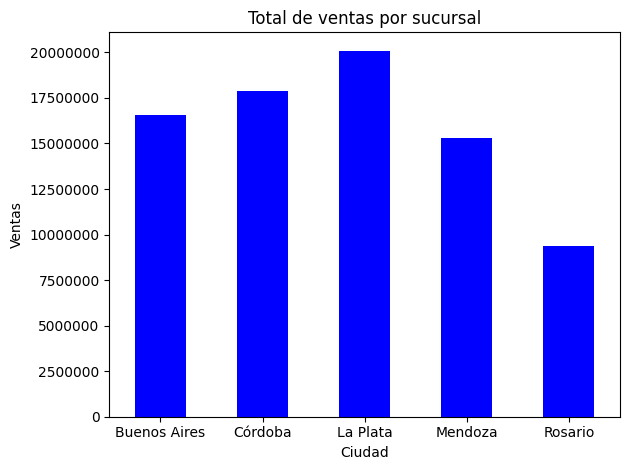

In [17]:
#creamos la columna
vt["TotalVenta"] = vt["Precio_Unitario"] * vt["Cantidad"]

#agrupamos por ciudad
ventas_porciudad = vt.groupby("Ciudad")["TotalVenta"].sum()

#graficamos
ventas_porciudad.plot(kind="bar", color="blue")
plt.title("Total de ventas por sucursal")
plt.ylabel("Ventas")
plt.ticklabel_format(axis='y', style='plain')
plt.xlabel("Ciudad")
plt.xticks(rotation=360)
plt.tight_layout()
#guardamos
plt.savefig("grafico_ventas.png")
plt.show()


Crear un nuevo DataFrame a partir del anterior que solo contenga las ventas de monitores del primer trimestre de 2024. Luego, realizar un gráfico de barras para visualizar en qué ciudad se vendieron más monitores el último trimestre

In [18]:
#aseguramos que la columna Fecha sea de tipo datetime
vt["Fecha"] = pd.to_datetime(vt["Fecha"])

#filtramos
ventas_monitores = vt[
    (vt["Producto"] == "Monitor") &
    (vt["Fecha"].dt.year == 2024) &
    (vt["Fecha"].dt.month <= 3)
]
#guardamos el nuevo DataFrame como CSV
ventas_monitores.to_csv("ventas_monitores.csv", index=False)
ventas_monitores

,Fecha,Producto,Vendedor,Ciudad,Cantidad,Precio_Unitario,TotalVenta
0,2024-01-01,Monitor,Juan,Mendoza,6,23030,138180
10,2024-01-11,Monitor,Sofía,Córdoba,1,51271,51271
15,2024-01-16,Monitor,María,Mendoza,8,55448,443584
19,2024-01-20,Monitor,Juan,Córdoba,6,9632,57792
22,2024-01-23,Monitor,María,Buenos Aires,5,114779,573895
26,2024-01-27,Monitor,Lucía,La Plata,3,87152,261456
32,2024-02-02,Monitor,María,Rosario,1,17910,17910
33,2024-02-03,Monitor,Pedro,La Plata,5,78479,392395
38,2024-02-08,Monitor,Sofía,Buenos Aires,9,53447,481023
39,2024-02-09,Monitor,Pedro,Mendoza,8,131394,1051152


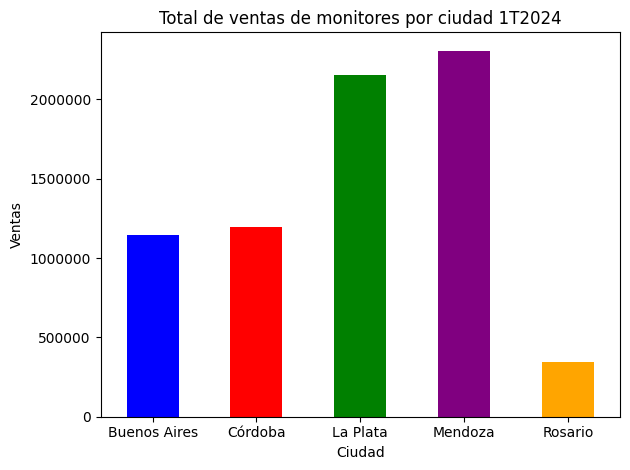

In [19]:
vtas_monitoresporciudad=ventas_monitores.groupby("Ciudad")["TotalVenta"].sum()
vtas_monitoresporciudad.plot(kind="bar", color=["blue", "red", "green", "purple", "orange"])
plt.title("Total de ventas de monitores por ciudad 1T2024")
plt.ylabel("Ventas")
plt.ticklabel_format(axis='y', style='plain')
plt.xlabel("Ciudad")
plt.xticks(rotation=360)
plt.tight_layout()

Suponga que la vendedora Lucía informa que había aumentado el precio de los monitores que vendió el 6 de Marzo de 2024. Modificar el precio en la base de datos a 10500.

In [20]:
#vamos de a poco: primero encontremos la fila
filtro = (ventas_monitores['Fecha'] == '2024-03-06') & (ventas_monitores['Vendedor'] == 'Lucía')

venta_lucia = ventas_monitores[filtro]
venta_lucia


,Fecha,Producto,Vendedor,Ciudad,Cantidad,Precio_Unitario,TotalVenta
65,2024-03-06,Monitor,Lucía,Rosario,5,5846,29230


In [21]:
ventas_monitores.loc[65, 'Precio_Unitario'] = 10500  #cambia

ventas_monitores[filtro] #noten que no se actualizó el Total

,Fecha,Producto,Vendedor,Ciudad,Cantidad,Precio_Unitario,TotalVenta
65,2024-03-06,Monitor,Lucía,Rosario,5,10500,29230


In [22]:
#recalculamos el total
ventas_monitores.loc[filtro, 'TotalVenta'] = (
    ventas_monitores.loc[filtro, 'Precio_Unitario'] *
    ventas_monitores.loc[filtro, 'Cantidad'])
ventas_monitores[filtro]

,Fecha,Producto,Vendedor,Ciudad,Cantidad,Precio_Unitario,TotalVenta
65,2024-03-06,Monitor,Lucía,Rosario,5,10500,52500


Se desea evaluar el desempeño de la vendedora Sofía. Realizar un gráfico con la evolución de las cantidades de ventas a lo largo del tiempo.

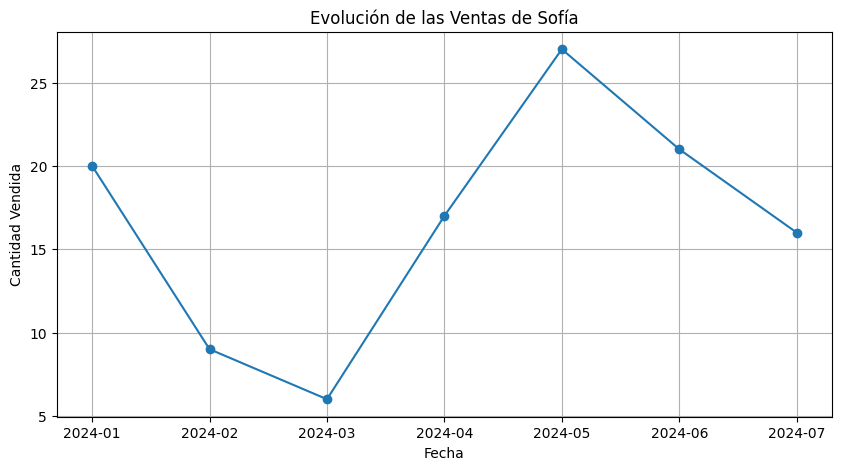

In [23]:
#filtramos las ventas de Sofía
vt_sofia = vt[vt['Vendedor'] == 'Sofía']

#agrupamos por fecha y sumamos cantidades, especificamos por mes
ventas_por_fecha = vt_sofia.groupby(vt_sofia['Fecha'].dt.to_period('M'))['Cantidad'].sum().reset_index()

ventas_por_fecha['Fecha'] = ventas_por_fecha['Fecha'].astype(str) #antes nos había quedado como period, pasamos a string y se ven como "YYYY-MM" en el eje x

#graficamos
plt.figure(figsize=(10,5))
plt.plot(ventas_por_fecha['Fecha'], ventas_por_fecha['Cantidad'],marker='o')
plt.title('Evolución de las Ventas de Sofía')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Vendida')
plt.grid(True)


# 🥇 ⚡ 🤓 Ejercicio 4

Suponga que usted es ayudante de Cátedra. El profesor titular le solicita que compare el rendimiento de los alumnos del segundo cuatrimestre de 2024 con el del primer cuatrimestre de 2025. Para eso, provee las planillas de calificaciones y condición final.
Cacular, en cada caso:

1.   Promedio de nota de cada parcial y de la nota final
2.   Nota final mínima y máxima
3.   Cantidad de alumnos que aprobaron la materia
4.   Cantidad de alumnos que promocionaron la materia
5.   Porcentaje de aprobación
6.   Crear un DataFrame de comparación con las métricas anteriores para ambos cuatrimestres.




In [24]:
notas_2024=pd.read_excel('/content/notas_2024.xlsx')
notas_2025=pd.read_excel('/content/notas_2025.xlsx')


In [25]:
#función para analizar cada planilla y devolver datos
def analisis_notas(df, year):
    #convertimos las celdas con texto
    df_numerico = df.replace(['A', 'Ausente', 'Insuficiente', 'Promociona', 'Final'], np.nan)
    df_numerico = df_numerico.apply(pd.to_numeric, errors='coerce')

    #promedios notas
    if year == "2024":
        prom_1 = df_numerico['1 Parcial'].mean()
        prom_2 = df_numerico['2 Parcial'].mean()
    elif year == "2025":
        prom_1 = df_numerico['1 parcial'].mean()
        prom_2 = df_numerico['2 parcial'].mean()

    prom_final = df_numerico['Nota final'].mean()

    #nota mínima y máxima
    nota_min = df_numerico['Nota final'].min()
    nota_max = df_numerico['Nota final'].max()

    #aprobados y promocionados
    alumnos_totales = df.shape[0]
    aprobados = df[df['Situación'].isin(['Promociona', 'Final'])].shape[0]
    promocionados = df[df['Situación'] == 'Promociona'].shape[0]
    porcentaje_aprobados = (aprobados / alumnos_totales) * 100

    #devolvemos como diccionario
    return {
        'Promedio 1 Parcial': prom_1,
        'Promedio 2 Parcial': prom_2,
        'Promedio Nota Final': prom_final,
        'Nota Final Mínima': nota_min,
        'Nota Final Máxima': nota_max,
        'Cantidad Aprobados': aprobados,
        'Total de alumnos': alumnos_totales,
        'Cantidad Promocionados': promocionados,
        'Porcentaje Aprobación': porcentaje_aprobados
    }

result_2024 = analisis_notas(notas_2024, "2024")
result_2025 = analisis_notas(notas_2025, "2025")

#creamos DataFrame comparativo
comparacion = pd.DataFrame({
    '2024': result_2024,
    '2025': result_2025
})

comparacion


/tmp/ipython-input-3449797303.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_numerico = df.replace(['A', 'Ausente', 'Insuficiente', 'Promociona', 'Final'], np.nan)


,2024,2025
Promedio 1 Parcial,3.349206,3.010526
Promedio 2 Parcial,3.780000,4.267606
Promedio Nota Final,3.210526,3.200000
Nota Final Mínima,2.000000,1.000000
Nota Final Máxima,9.000000,10.000000
Cantidad Aprobados,15.000000,22.000000
Total de alumnos,81.000000,127.000000
Cantidad Promocionados,8.000000,14.000000
Porcentaje Aprobación,18.518519,17.322835


Realice un gráfico de barras apiladas para ambos cuatrimestres, que muestre la proporción de promocionados, insuficientes y regularizados.

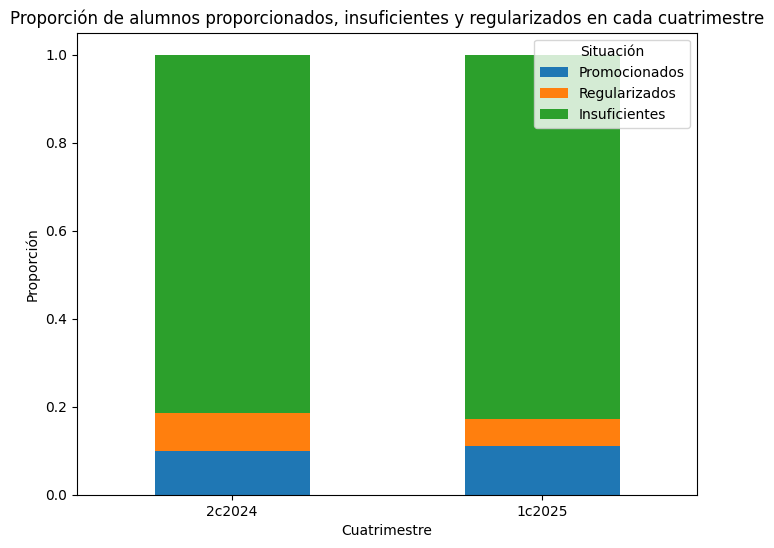

In [26]:
insuficientes_2024 = result_2024['Total de alumnos'] - result_2024['Cantidad Aprobados']
regulares_2024 = result_2024['Cantidad Aprobados'] - result_2024['Cantidad Promocionados']

insuficientes_2025 = result_2025['Total de alumnos'] - result_2025['Cantidad Aprobados']
regulares_2025 = result_2025['Cantidad Aprobados'] - result_2025['Cantidad Promocionados']

#creamos el DataFrame con las proporciones
proporciones = pd.DataFrame({
    '2c2024': [result_2024['Cantidad Promocionados'] / result_2024['Total de alumnos'],
             regulares_2024 / result_2024['Total de alumnos'],
             insuficientes_2024 / result_2024['Total de alumnos']],
    '1c2025': [result_2025['Cantidad Promocionados'] / result_2025['Total de alumnos'],
             regulares_2025 / result_2025['Total de alumnos'],
             insuficientes_2025 / result_2025['Total de alumnos']]
}, index=['Promocionados', 'Regularizados', 'Insuficientes'])

#graficamos
proporciones.T.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Proporción de alumnos proporcionados, insuficientes y regularizados en cada cuatrimestre')
plt.xlabel('Cuatrimestre')
plt.ylabel('Proporción')
plt.xticks(rotation=0)
plt.legend(title='Situación')

-Actividad propuesta: Los estudiantes conformarán grupos de 2 integrantes para su realización
1. Elegir una de las bases de datos proporcionadas por el equipo docente
2. Obtener todas las métricas que sean consideradas pertinentes para el análisis exhaustivo de la base
3. Realizar gráficos que permitan visualizar aspectos de interés de la base
4. Crear un nuevo DataFrame que muestre alguna comparación o resumen proveniente de la base
5. Obtener conclusiones del trabajo realizado
-Presentación de la Actividad y devoluciones


Fuentes:

Notas de álgebra teórico-prácticas: cátedra de Álgebra / Alicia Delia Fraquelli;Andrea Leonor Gache. - 1a ed. - Ciudad Autónoma de Buenos Aires: Universidad de Buenos Aires. Facultad de Ciencias Económicas, 2019.

Hilpisch, Y. (2018). Python for Finance: Mastering Data-Driven Finance (2nd ed.). O’Reilly Media.